In [213]:
import pandas as pd
import sqlite3
import os
import time

In [214]:
conn = sqlite3.connect('inventory_db.sqlite3')

In [215]:
tables=pd.read_sql_query("select name from sqlite_master where type='table'",conn)

### In an SQLite database, there can be different kinds of objects like:

* __Tables__ (store actual data)

* __Views__ (virtual tables from queries)

* __Indexes__ (used to speed up searches)

* __Triggers__ (run automatically on data changes
#### sqlite_master is a <u> system table that tracks all the objects.
_type="table"_ render only tables from Database

In [216]:
#DEFINING TABLES IN DATABASE
import os

# List files in current directory
files = os.listdir()

# List files in a specific directory
files = os.listdir('C:/Users/Shree/Documents')

print(tables)

                   name
0       begin_inventory
1         end_inventory
2             purchases
3       purchase_prices
4                 sales
5        vendor_invoice
6  Vendor_Sales_Summary


In [217]:
# You can use this to dynamically access all tables instead of above
for table in tables['name']:
    df = pd.read_sql_query(f"SELECT * FROM {table}", conn)
    print(f"{table} has {len(df)} rows")


begin_inventory has 206529 rows
end_inventory has 224489 rows
purchases has 2372474 rows
purchase_prices has 12261 rows
sales has 12825363 rows
vendor_invoice has 5543 rows
Vendor_Sales_Summary has 10692 rows


### To know data types of tables in Databade

In [116]:
print(type(begin_inventory))
print(type(end_inventory))
print(type(purchases))
print(type(purchase_prices))
print(type(sales))
print(type(vendor_invoice))
print(type(Vendor_Sales_Summery ))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [45]:
import pandas as pd

# Replace 'conn' with your actual database connection variable
purchases = pd.read_sql("SELECT * FROM purchases", conn)


### Get all Info about Table

In [113]:
pd.read_sql_query("PRAGMA table_info(sales)", conn)

,cid,name,type,notnull,dflt_value,pk
0,0,InventoryId,TEXT,0,None,0
1,1,Store,BIGINT,0,None,0
2,2,Brand,BIGINT,0,None,0
3,3,Description,TEXT,0,None,0
4,4,Size,TEXT,0,None,0
5,5,SalesQuantity,BIGINT,0,None,0
6,6,SalesDollars,FLOAT,0,None,0
7,7,SalesPrice,FLOAT,0,None,0
8,8,SalesDate,TEXT,0,None,0
9,9,Volume,FLOAT,0,None,0


### Glimps of Data from each Table

In [4]:
# Loop through each table name in the 'name' column of the 'tables' DataFrame
for table in tables["name"]:
    # Print a separator line with the table name for visual clarity
    print('-'*50, f'{table}','-'*50)
    
    # Query and print the total number of records in the current table
    print('Count of Records:', pd.read_sql(f"select count(*) as count from {table}",conn)['count'].values[0])
    
    # Display the first 3 rows of the current table using pandas and SQL
    display(pd.read_sql(f"select * from {table} limit 3",conn))

-------------------------------------------------- begin_inventory --------------------------------------------------
Count of Records: 206529


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01


-------------------------------------------------- end_inventory --------------------------------------------------
Count of Records: 224489


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31


-------------------------------------------------- purchases --------------------------------------------------
Count of Records: 2372474


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1


-------------------------------------------------- purchase_prices --------------------------------------------------
Count of Records: 12261


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP


-------------------------------------------------- sales --------------------------------------------------
Count of Records: 12825363


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


-------------------------------------------------- vendor_invoice --------------------------------------------------
Count of Records: 5543


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None


-------------------------------------------------- Vendor_Sales_Summery --------------------------------------------------
Count of Records: 10692


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrosssProfit,ProfitMargine,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,0,0,0,0,68601.68,-3811251.60,-inf,0.0,0.0
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,0,0,0,0,144929.24,-3804041.22,-inf,0.0,0.0
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,0,0,0,0,123780.22,-3418303.68,-inf,0.0,0.0


In [5]:
for purchases in tables['name']:#------------------------------------------------------1
    display(pd.read_sql(f"select * from {purchases} limit 5",conn))

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31


,InventoryId,Store,Brand,Description,Size,VendorNumber,VendorName,PONumber,PODate,ReceivingDate,InvoiceDate,PayDate,PurchasePrice,Quantity,Dollars,Classification
0,69_MOUNTMEND_8412,69,8412,Tequila Ocho Plata Fresno,750mL,105,ALTAMAR BRANDS LLC,8124,2023-12-21,2024-01-02,2024-01-04,2024-02-16,35.71,6,214.26,1
1,30_CULCHETH_5255,30,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,4,37.40,1
2,34_PITMERDEN_5215,34,5215,TGI Fridays Long Island Iced,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-02,2024-01-07,2024-02-21,9.41,5,47.05,1
3,1_HARDERSFIELD_5255,1,5255,TGI Fridays Ultimte Mudslide,1.75L,4466,AMERICAN VINTAGE BEVERAGE,8137,2023-12-22,2024-01-01,2024-01-07,2024-02-21,9.35,6,56.10,1
4,76_DONCASTER_2034,76,2034,Glendalough Double Barrel,750mL,388,ATLANTIC IMPORTING COMPANY,8169,2023-12-24,2024-01-02,2024-01-09,2024-02-16,21.32,5,106.60,1


,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,58,Gekkeikan Black & Gold Sake,12.99,750mL,750,1,9.28,8320,SHAW ROSS INT L IMP LTD
1,62,Herradura Silver Tequila,36.99,750mL,750,1,28.67,1128,BROWN-FORMAN CORP
2,63,Herradura Reposado Tequila,38.99,750mL,750,1,30.46,1128,BROWN-FORMAN CORP
3,72,No. 3 London Dry Gin,34.99,750mL,750,1,26.11,9165,ULTRA BEVERAGE COMPANY LLP
4,75,Three Olives Tomato Vodka,14.99,750mL,750,1,10.94,7245,PROXIMO SPIRITS INC.


,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,105,ALTAMAR BRANDS LLC,2024-01-04,8124,2023-12-21,2024-02-16,6,214.26,3.47,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
2,388,ATLANTIC IMPORTING COMPANY,2024-01-09,8169,2023-12-24,2024-02-16,5,106.60,4.61,None
3,480,BACARDI USA INC,2024-01-12,8106,2023-12-20,2024-02-05,10100,137483.78,2935.20,None
4,516,BANFI PRODUCTS CORP,2024-01-07,8170,2023-12-24,2024-02-12,1935,15527.25,429.20,None


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrosssProfit,ProfitMargine,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,0,0,0,0,68601.68,-3811251.60,-inf,0.0,0.0
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,0,0,0,0,144929.24,-3804041.22,-inf,0.0,0.0
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,0,0,0,0,123780.22,-3418303.68,-inf,0.0,0.0
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,0,0,0,0,257032.07,-3261197.94,-inf,0.0,0.0
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,0,0,0,0,257032.07,-3023206.01,-inf,0.0,0.0


In [6]:
purchase_prices=pd.read_sql_query("select * from purchase_prices where VendorNumber=4466",conn)
purchase_prices

,Brand,Description,Price,Size,Volume,Classification,PurchasePrice,VendorNumber,VendorName
0,5215,TGI Fridays Long Island Iced,12.99,1750mL,1750,1,9.41,4466,AMERICAN VINTAGE BEVERAGE
1,5255,TGI Fridays Ultimte Mudslide,12.99,1750mL,1750,1,9.35,4466,AMERICAN VINTAGE BEVERAGE
2,3140,TGI Fridays Orange Dream,14.99,1750mL,1750,1,11.19,4466,AMERICAN VINTAGE BEVERAGE


In [7]:
vendor_invoice=pd.read_sql_query("select * from vendor_invoice where VendorNumber=4466",conn)
vendor_invoice

,VendorNumber,VendorName,InvoiceDate,PONumber,PODate,PayDate,Quantity,Dollars,Freight,Approval
0,4466,AMERICAN VINTAGE BEVERAGE,2024-01-07,8137,2023-12-22,2024-02-21,15,140.55,8.57,None
1,4466,AMERICAN VINTAGE BEVERAGE,2024-01-19,8207,2023-12-27,2024-02-26,335,3142.33,16.97,None
2,4466,AMERICAN VINTAGE BEVERAGE,2024-01-18,8307,2024-01-03,2024-02-18,41,383.35,1.99,None
3,4466,AMERICAN VINTAGE BEVERAGE,2024-01-27,8469,2024-01-14,2024-03-11,72,673.20,3.30,None
4,4466,AMERICAN VINTAGE BEVERAGE,2024-02-04,8532,2024-01-19,2024-03-15,79,740.21,3.48,None
5,4466,AMERICAN VINTAGE BEVERAGE,2024-02-09,8604,2024-01-24,2024-03-15,347,3261.37,17.61,None
6,4466,AMERICAN VINTAGE BEVERAGE,2024-02-17,8793,2024-02-05,2024-04-02,72,675.36,3.17,None
7,4466,AMERICAN VINTAGE BEVERAGE,2024-03-01,8892,2024-02-12,2024-03-28,117,1096.05,5.15,None
8,4466,AMERICAN VINTAGE BEVERAGE,2024-03-07,8995,2024-02-19,2024-04-02,129,1209.27,5.44,None
9,4466,AMERICAN VINTAGE BEVERAGE,2024-03-12,9033,2024-02-22,2024-04-16,147,1377.87,6.61,None


In [8]:
sales=pd.read_sql_query("select * from sales where VendorNo=4466",conn)
sales

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
1,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-12,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
2,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-15,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
3,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
4,1_HARDERSFIELD_5215,1,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-01-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9448,9_BLACKPOOL_5215,9,5215,TGI Fridays Long Island Iced,1.75L,1,12.99,12.99,2024-12-21,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9449,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-02,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9450,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-09,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE
9451,9_BLACKPOOL_5255,9,5255,TGI Fridays Ultimte Mudslide,1.75L,1,12.99,12.99,2024-12-23,1750.0,1,1.84,4466,AMERICAN VINTAGE BEVERAGE


In [9]:
purchases

'Vendor_Sales_Summery'

In [10]:
end_inventory=pd.read_sql_query("select * from end_inventory",conn)
end_inventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2024-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2024-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2024-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2024-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2024-12-31
...,...,...,...,...,...,...,...,...,...
224484,81_PEMBROKE_90087,81,PEMBROKE,90087,Ch Mouton Rothschild 12 Paui,750mL,3,469.99,2024-12-31
224485,81_PEMBROKE_90088,81,PEMBROKE,90088,Ch Le Petite Mouton 12 Pauil,750mL,3,134.99,2024-12-31
224486,81_PEMBROKE_90089,81,PEMBROKE,90089,Ch Lynch Bages 12 Pauillac,750mL,3,119.99,2024-12-31
224487,81_PEMBROKE_90090,81,PEMBROKE,90090,Ch Lafite Rothschild 12,750mL,3,649.99,2024-12-31


In [11]:
begin_inventory=pd.read_sql_query("select * from begin_inventory",conn)
begin_inventory

,InventoryId,Store,City,Brand,Description,Size,onHand,Price,startDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,8,12.99,2024-01-01
1,1_HARDERSFIELD_60,1,HARDERSFIELD,60,Canadian Club 1858 VAP,750mL,7,10.99,2024-01-01
2,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,6,36.99,2024-01-01
3,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,3,38.99,2024-01-01
4,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,6,34.99,2024-01-01
...,...,...,...,...,...,...,...,...,...
206524,79_BALLYMENA_46985,79,BALLYMENA,46985,Rodney Strong Cab Svgn Alexa,750mL,13,22.99,2024-01-01
206525,79_BALLYMENA_47014,79,BALLYMENA,47014,Juan Gil Jumilla Rd,750mL,13,13.99,2024-01-01
206526,79_BALLYMENA_47090,79,BALLYMENA,47090,Napa Cellars Cab Svgn Napa,750mL,19,23.99,2024-01-01
206527,79_BALLYMENA_90011,79,BALLYMENA,90011,Ch Pichon Longville 12 Pauil,750mL,12,144.99,2024-01-01


In [13]:
#purchases.groupby(['Brand','PurchasePrice'])[['Quantity','Dollars']].sum()

# Finding Duplicate Values

In [14]:
# duplicates = pd.read_sql(f"""
#     SELECT {column_name}, COUNT(*) as duplicate_count
#     FROM {table_name}
#     GROUP BY {column_name}
#     HAVING COUNT(*) > 1
# """, conn)

# if not duplicates.empty:
#     print(f"Duplicates found in column '{column_name}' of table '{table_name}':")
#     print(duplicates)
# else:
#     print(f"No duplicates found in column '{column_name}' of table '{table_name}'.")


In [15]:
duplicates = pd.read_sql(f"""
    SELECT {'PONumber'}, COUNT(*) as duplicate_count
    FROM {'vendor_invoice'}
    GROUP BY {'PONumber'}
    HAVING COUNT(*) > 1
""", conn)

if not duplicates.empty:
    print(f"Duplicates found in column '{'PONumber'}' of table '{'vendor_invoice'}':")
    print(duplicates)
else:
    print(f"No duplicates found in column '{'PONumber'}' of table '{'vendor_invoice'}'.")


No duplicates found in column 'PONumber' of table 'vendor_invoice'.


In [16]:
vendor_invoice['PONumber'].nunique()

55

In [17]:
vendor_invoice.shape

(55, 10)

In [18]:
df_PONumber= pd.read_sql('select "PONumber" as PO_num from "vendor_invoice"',conn)
df_PONumber.tail()

,PO_num
5538,13626
5539,13661
5540,13643
5541,13602
5542,13574


In [19]:
sales['Brand'].nunique()

3

In [20]:
sales.shape

(9453, 14)

In [30]:
type(purchases)

str

In [47]:
purchases.groupby(['Brand', 'PurchasePrice','Description'])[['Quantity', 'Dollars']].sum()

,,,Quantity,Dollars
Brand,PurchasePrice,Description,,
58,9.28,Gekkeikan Black & Gold Sake,3550,32944.00
60,7.40,Canadian Club 1858 VAP,1633,12084.20
61,10.60,Margaritaville Silver,312,3307.20
62,28.67,Herradura Silver Tequila,3200,91744.00
63,30.46,Herradura Reposado Tequila,2855,86963.30
...,...,...,...,...
90089,77.92,Ch Lynch Bages 12 Pauillac,32,2493.44
90090,448.27,Ch Lafite Rothschild 12,6,2689.62
90604,78.42,Ch Lynch Bages Pauilac,118,9253.56


In [48]:
sales.groupby('Brand')[['SalesDollars','SalesPrice','SalesQuantity']].sum()

,SalesDollars,SalesPrice,SalesQuantity
Brand,,,
3140,50531.10,30071.85,3890
5215,60416.49,41542.02,4651
5255,79187.04,51180.60,6096


# Combined Data
## 1-Purchases by Vendor ##
## 2-Sales transaction data
## 3-Freight cost for each Vendor
## 4-Actual product price from Vendors

In [49]:
tables=pd.read_sql("select name from sqlite_master where type='table'",conn)
for table in tables['name']:
    df=pd.read_sql(f"select * from'{table}'",conn)
    print(f"Table: {table} - Shape: {df.shape}")

Table: begin_inventory - Shape: (206529, 9)
Table: end_inventory - Shape: (224489, 9)
Table: purchases - Shape: (2372474, 16)
Table: purchase_prices - Shape: (12261, 9)
Table: sales - Shape: (12825363, 14)
Table: vendor_invoice - Shape: (5543, 10)
Table: Vendor_Sales_Summery - Shape: (10692, 18)


In [51]:
vendor_invoice.columns

Index(['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate',
       'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval'],
      dtype='object')

## Combined Data ##
### purchases + purchase_price ###

In [52]:
pd.read_sql_query("""select 
p.VendorNumber,
p.VendorName,
p.Brand,
p.PurchasePrice,
pp.Volume,
pp.Price as ActualPrice,
sum(p.Dollars) as TotalPurchaseDollars,
sum(p.Quantity) as TotalPurchaseQuantity
from purchases p
join purchase_prices pp
on p.Brand=pp.Brand
where p.PurchasePrice >0
GROUP by p.VendorNumber, p.VendorName, p.Brand
order by TotalPurchaseDollars""",conn)

,VendorNumber,VendorName,Brand,PurchasePrice,Volume,ActualPrice,TotalPurchaseDollars,TotalPurchaseQuantity
0,7245,PROXIMO SPIRITS INC.,3065,0.71,50,0.99,0.71,1
1,3960,DIAGEO NORTH AMERICA INC,6127,1.47,200,1.99,1.47,1
2,3924,HEAVEN HILL DISTILLERIES,9123,0.74,50,0.99,1.48,2
3,8004,SAZERAC CO INC,5683,0.39,50,0.49,2.34,6
4,9815,WINE GROUP INC,8527,1.32,750,4.99,2.64,2
...,...,...,...,...,...,...,...,...
10687,3960,DIAGEO NORTH AMERICA INC,3545,21.89,1750,29.99,3023206.01,138109
10688,3960,DIAGEO NORTH AMERICA INC,4261,16.17,1750,22.99,3261197.94,201682
10689,17035,PERNOD RICARD USA,8068,18.24,1750,24.99,3418303.68,187407
10690,4425,MARTIGNETTI COMPANIES,3405,23.19,1750,28.99,3804041.22,164038


In [ ]:
sales.columns

### sales table ###

In [53]:
pd.read_sql_query(""" select
VendorNo,
Brand,
sum(SalesDollars) as TotalSalesDollars,
sum(SalesPrice) as TotalSalesPrice,
sum(SalesQuantity) as TotalSalesQuantity,
sum(ExciseTax) as TotalExciseTax
from sales
group by VendorNo, Brand
order by TotalSalesDollars
""",conn)

,VendorNo,Brand,TotalSalesDollars,TotalSalesPrice,TotalSalesQuantity,TotalExciseTax
0,8004,5287,0.98,0.98,2,0.10
1,9206,2773,0.99,0.99,1,0.05
2,3252,3933,1.98,0.99,2,0.10
3,3924,9123,1.98,0.99,2,0.10
4,10050,3623,1.98,1.98,2,0.10
...,...,...,...,...,...,...
11267,3960,3545,4223107.62,545778.28,135838,249587.83
11268,3960,4261,4475972.88,420050.01,200412,368242.80
11269,17035,8068,4538120.60,461140.15,187140,343854.07
11270,4425,3405,4819073.49,561512.37,160247,294438.66


## purchase_prices Table

In [54]:
pd.read_sql_query("""select
VendorNumber,
VendorName,
sum(volume) as Aukat,
sum(Price) as total_price
from purchase_prices 
group by VendorNumber""",conn)

,VendorNumber,VendorName,Aukat,total_price
0,2,"IRA GOLDMAN AND WILLIAMS, LLP",912.5,61.98
1,54,AAPER ALCOHOL & CHEMICAL CO,3750.0,134.49
2,60,ADAMBA IMPORTS INTL INC,4250.0,50.97
3,105,ALTAMAR BRANDS LLC,1600.0,86.97
4,200,AMERICAN SPIRITS EXCHANGE,2250.0,36.97
...,...,...,...,...
126,90059,BLACK COVE BEVERAGES,375.0,19.99
127,98450,Serralles Usa LLC,15625.0,332.84
128,99166,STARK BREWING COMPANY,750.0,29.99
129,172662,SWEETWATER FARM,3375.0,135.45


In [55]:
inventory=pd.read_sql_query("""
    select distinct InventoryId
    from purchases
""",conn)
print(inventory)

                InventoryId
0         69_MOUNTMEND_8412
1          30_CULCHETH_5255
2         34_PITMERDEN_5215
3       1_HARDERSFIELD_5255
4         76_DONCASTER_2034
...                     ...
245902   76_DONCASTER_23860
245903   38_GOULCREST_23860
245904    49_GARIGILL_23860
245905     60_IRRAGIN_46662
245906  62_KILMARNOCK_24953

[245907 rows x 1 columns]


In [56]:
purchases['InventoryId'].nunique

<bound method IndexOpsMixin.nunique of 0             69_MOUNTMEND_8412
1              30_CULCHETH_5255
2             34_PITMERDEN_5215
3           1_HARDERSFIELD_5255
4             76_DONCASTER_2034
                   ...         
2372469       49_GARIGILL_22298
2372470    1_HARDERSFIELD_19556
2372471     66_EANVERNESS_22297
2372472      69_MOUNTMEND_19557
2372473      55_DRY GULCH_22298
Name: InventoryId, Length: 2372474, dtype: object>

In [57]:
purchase_prices.columns

Index(['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification',
       'PurchasePrice', 'VendorNumber', 'VendorName'],
      dtype='object')

In [58]:
sales.columns

Index(['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity',
       'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification',
       'ExciseTax', 'VendorNo', 'VendorName'],
      dtype='object')

In [ ]:
vendor_invoice.columns

In [59]:
Freight_summary=pd.read_sql_query("""select
    VendorNumber,
    sum(Freight) as FreightCost
from vendor_invoice
group by VendorNumber""",conn)
Freight_summary

,VendorNumber,FreightCost
0,2,27.08
1,54,0.48
2,60,367.52
3,105,62.39
4,200,6.19
...,...,...
121,98450,856.02
122,99166,130.09
123,172662,178.34
124,173357,202.50


In [83]:
Freight_summary['FreightCost'].sum()

np.float64(1640474.6900000002)

In [84]:
vendor_invoice['Freight'].sum()

np.float64(1640474.6900000002)

In [94]:
# Take full records from database
sales = pd.read_sql_query("SELECT * FROM sales", conn)

### get .csv files

In [99]:
import os
for item in os.listdir():
    if item.endswith('.csv'):
        print(item)

begin_inventory.csv
end_inventory.csv
purchases.csv
purchase_prices.csv
sales.csv
vendor_invoice.csv


### All files in DataFrame and files in Database

In [98]:
import pandas as pd

# List of table names (as strings)
table_names = [
    "begin_inventory",
    "end_inventory",
    "purchases",
    "purchase_prices",
    "sales",
    "vendor_invoice"
]

# Loop through each table
for name in table_names:
    # Get the in-memory DataFrame using globals()
    df = globals()[name]
    df_len = len(df)

    # Query row count from the database
    sql = f"SELECT COUNT(*) AS count FROM {name}"
    db_len = pd.read_sql_query(sql, conn)['count'][0]

    # Print both counts side-by-side
    print(f"{name}: DataFrame rows = {df_len} | Database rows = {db_len}")


begin_inventory: DataFrame rows = 206529 | Database rows = 206529
end_inventory: DataFrame rows = 224489 | Database rows = 224489
purchases: DataFrame rows = 2372474 | Database rows = 2372474
purchase_prices: DataFrame rows = 12261 | Database rows = 12261
sales: DataFrame rows = 12825363 | Database rows = 12825363
vendor_invoice: DataFrame rows = 5543 | Database rows = 5543


## CREATING MASTER TABLE OF 
### 1)VENDOR PURCHASES
### 2) VENDOR SALES
### 3) FREIGHT
### 4) ANNUAL PRODUCTION PRICE

In [ ]:
# # CREATING MASTER TABLE OF 1)VENDOR PURCHASES, 2) VENDOR SALES 3) fREIGHT 4) ANNUAL PRODUCTION PRICE
# import time
# start=time.time()
# final_table=pd.read_sql_query("""select
# pp.VendorNumber,
# pp.Brand,
# pp.Price,
# pp.PurchasePrice,
# sum(s.SalesQuantity) as TotalSalesQuantity,
# sum(s.SalesDollars) as TotalSalesDollars,
# sum(s.SalesPrice) as TotalSalesPrice,
# sum(s.ExciseTax) as TotalExciseTax,
# sum(vi.Quantity) as TotalQuantity,
# sum(vi.Dollars) as TotalDollars,
# sum(vi.Freight) as TotalFreight
# from purchase_prices pp
# join sales s
# on pp.VendorNumber = s.VendorNo
# and pp.Brand= s.Brand
# join vendor_invoice vi
# on pp.VendorNumber=vi.VendorNumber
# group by pp.VendorNumber,pp.Brand,pp.Price,pp.PurchasePrice
# """,conn)
# end=time.time()

In [ ]:
# final_table = pd.read_sql_query("""
# SELECT
#     pp.VendorNumber,
#     pp.Brand,
#     pp.Price,
#     pp.PurchasePrice,
#     SUM(s.SalesQuantity) AS TotalSalesQuantity,
#     SUM(s.SalesDollars) AS TotalSalesDollars,
#     SUM(s.SalesPrice) AS TotalSalesPrice,
#     SUM(s.ExciseTax) AS TotalExciseTax,
#     vi_summary.TotalQuantity,
#     vi_summary.TotalDollars,
#     vi_summary.TotalFreight
# FROM purchase_prices pp
# JOIN sales s
#   ON pp.VendorNumber = s.VendorNo AND pp.Brand = s.Brand
# LEFT JOIN (
#     SELECT VendorNumber,
#            SUM(Quantity) AS TotalQuantity,
#            SUM(Dollars) AS TotalDollars,
#            SUM(Freight) AS TotalFreight
#     FROM vendor_invoice
#     GROUP BY VendorNumber
# ) vi_summary
#   ON pp.VendorNumber = vi_summary.VendorNumber
# GROUP BY pp.VendorNumber, pp.Brand, pp.Price, pp.PurchasePrice
# """, conn)


In [165]:
pd.read_sql_query("select * from sales limit 10",conn)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
3,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,14.49,14.49,2024-01-08,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
4,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,2,69.98,34.99,2024-01-09,375.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
5,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-15,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
6,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-22,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
7,1_HARDERSFIELD_1005,1,1005,Maker's Mark Combo Pack,375mL 2 Pk,1,34.99,34.99,2024-01-30,375.0,1,0.39,12546,JIM BEAM BRANDS COMPANY
8,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,4,59.96,14.99,2024-01-05,750.0,2,0.45,2000,SOUTHERN WINE & SPIRITS NE
9,1_HARDERSFIELD_10058,1,10058,F Coppola Dmd Ivry Cab Svgn,750mL,1,14.99,14.99,2024-01-06,750.0,2,0.11,2000,SOUTHERN WINE & SPIRITS NE


#### Master Table

In [175]:
Vendor_Sales_Summary = pd.read_sql_query("""
WITH FreightSummary AS (
    SELECT
        VendorNumber,
        SUM(Freight) AS FreightCost
    FROM vendor_invoice
    GROUP BY VendorNumber
),

PurchaseSummary AS (
    SELECT
        p.VendorNumber,
        p.VendorName,
        p.Brand,
        p.Description,
        p.PurchasePrice,
        pp.Price AS ActualPrice,
        pp.Volume,
        SUM(p.Quantity) AS TotalPurchaseQuantity,
        SUM(p.Dollars) AS TotalPurchaseDollars
    FROM purchases p
    JOIN purchase_prices pp
        ON p.Brand = pp.Brand
    WHERE p.PurchasePrice > 0
    GROUP BY p.VendorNumber, p.VendorName, p.Brand, p.Description, p.PurchasePrice, pp.Volume
),

SalesSummary AS (
    SELECT
        VendorNo,
        Brand,
        SUM(SalesQuantity) AS TotalSalesQuantity,
        SUM(SalesDollars) AS TotalSalesDollars,
        SUM(SalesPrice) AS TotalSalesPrice,
        SUM(ExciseTax) AS TotalExciseTax
    FROM sales
    GROUP BY VendorNo, Brand
)

SELECT
    ps.VendorNumber,
    ps.VendorName,
    ps.Brand,
    ps.Description,
    ps.PurchasePrice,
    ps.ActualPrice,
    ps.Volume,
    ps.TotalPurchaseQuantity,
    ps.TotalPurchaseDollars,
    ss.TotalSalesQuantity,
    ss.TotalSalesDollars,
    ss.TotalSalesPrice,
    ss.TotalExciseTax,
    fs.FreightCost
FROM PurchaseSummary ps
LEFT JOIN SalesSummary ss
    ON ps.VendorNumber = ss.VendorNo
    AND ps.Brand = ss.Brand
LEFT JOIN FreightSummary fs
    ON ps.VendorNumber = fs.VendorNumber
ORDER BY ps.TotalPurchaseDollars DESC
""", conn)


In [177]:
Vendor_Sales_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750,2,2.64,5.0,15.95,10.96,0.55,27100.41
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50,6,2.34,134.0,65.66,1.47,7.04,50293.62
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50,2,1.48,2.0,1.98,0.99,0.10,14069.87
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200,1,1.47,72.0,143.28,77.61,15.12,257032.07


In [178]:
pd.read_sql_query("select * from sales limit 3",conn)

,InventoryId,Store,Brand,Description,Size,SalesQuantity,SalesDollars,SalesPrice,SalesDate,Volume,Classification,ExciseTax,VendorNo,VendorName
0,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-01,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY
1,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,2,32.98,16.49,2024-01-02,750.0,1,1.57,12546,JIM BEAM BRANDS COMPANY
2,1_HARDERSFIELD_1004,1,1004,Jim Beam w/2 Rocks Glasses,750mL,1,16.49,16.49,2024-01-03,750.0,1,0.79,12546,JIM BEAM BRANDS COMPANY


In [179]:
Vendor_Sales_Summary.head

<bound method NDFrame.head of        VendorNumber                   VendorName  Brand  \
0              1128  BROWN-FORMAN CORP             1233   
1              4425        MARTIGNETTI COMPANIES   3405   
2             17035  PERNOD RICARD USA             8068   
3              3960  DIAGEO NORTH AMERICA INC      4261   
4              3960  DIAGEO NORTH AMERICA INC      3545   
...             ...                          ...    ...   
10687          9815  WINE GROUP INC                8527   
10688          8004  SAZERAC CO INC                5683   
10689          3924  HEAVEN HILL DISTILLERIES      9123   
10690          3960  DIAGEO NORTH AMERICA INC      6127   
10691          7245  PROXIMO SPIRITS INC.          3065   

                       Description  PurchasePrice  ActualPrice Volume  \
0          Jack Daniels No 7 Black          26.27        36.99   1750   
1            Tito's Handmade Vodka          23.19        28.99   1750   
2                 Absolut 80 Proof        

#### ....This create a temporary in-memory DataFrame, not a database table.
* So Save DataFrame(Vendor_Sales_Summary) as Table in Database

In [205]:
Vendor_Sales_Summary.to_sql("Vendor_Sales_Summary", conn, if_exists="replace", index=False)

10692

In [119]:
pd.read_sql_query("select name from sqlite_master where type='table'",conn)

,name
0,begin_inventory
1,end_inventory
2,purchases
3,purchase_prices
4,sales
5,vendor_invoice
6,Vendor_Sales_Summary


#### Drop Extra Table

In [118]:
cursor = conn.cursor()

cursor.execute("DROP TABLE IF EXISTS Vendor_Sales_Summery")
conn.commit()

In [173]:
pd.read_sql_query("select SalesQuantity from sales",conn)

,SalesQuantity
0,1
1,2
2,1
3,1
4,2
...,...
12825358,1
12825359,1
12825360,3
12825361,1


In [123]:
pd.read_sql_query("SELECT COUNT(DISTINCT IFNULL(SalesQuantity, 0)) AS UniqueSalesQuantities FROM sales", conn)


,UniqueSalesQuantities
0,369


In [174]:
pd.read_sql_query("SELECT COUNT(*) AS NullCount FROM sales WHERE SalesQuantity IS NULL", conn)


,NullCount
0,0


In [122]:
pd.read_sql_query("SELECT IFNULL(SalesQuantity, 0) AS SalesQuantity FROM sales", conn)


,SalesQuantity
0,1
1,2
2,1
3,1
4,2
...,...
12825358,1
12825359,1
12825360,3
12825361,1


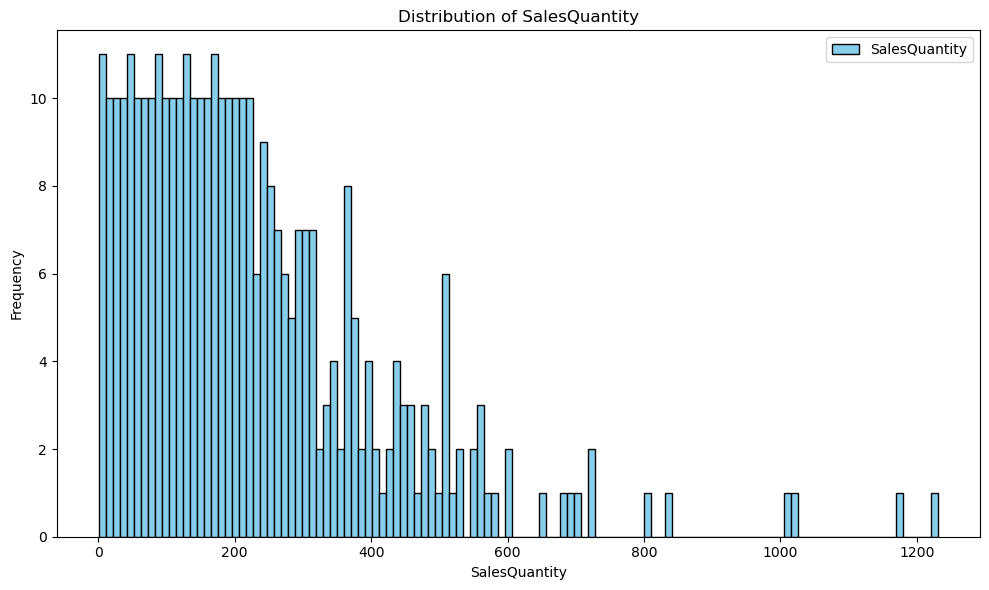

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Pass label directly here
plt.hist(df['SalesQuantity'], bins=120, color='skyblue', edgecolor='black', label='SalesQuantity')
plt.title("Distribution of SalesQuantity")
plt.xlabel("SalesQuantity")
plt.ylabel("Frequency")
plt.legend()  # This will now work
plt.tight_layout()
plt.show()


# Data Transformation

In [193]:
Vendor_Sales_Summary.dtypes

VendorNumber               int64
VendorName                object
Brand                      int64
Description               object
PurchasePrice            float64
ActualPrice              float64
Volume                   float64
TotalPurchaseQuantity      int64
TotalPurchaseDollars     float64
TotalSalesQuantity       float64
TotalSalesDollars        float64
TotalSalesPrice          float64
TotalExciseTax           float64
FreightCost              float64
dtype: object

In [192]:
Vendor_Sales_Summary.isnull().sum()

VendorNumber             0
VendorName               0
Brand                    0
Description              0
PurchasePrice            0
ActualPrice              0
Volume                   0
TotalPurchaseQuantity    0
TotalPurchaseDollars     0
TotalSalesQuantity       0
TotalSalesDollars        0
TotalSalesPrice          0
TotalExciseTax           0
FreightCost              0
dtype: int64

In [195]:
Vendor_Sales_Summary['VendorName'].unique()

array(['BROWN-FORMAN CORP', 'MARTIGNETTI COMPANIES', 'PERNOD RICARD USA',
       'DIAGEO NORTH AMERICA INC', 'BACARDI USA INC',
       'JIM BEAM BRANDS COMPANY', 'MAJESTIC FINE WINES',
       'ULTRA BEVERAGE COMPANY LLP', 'STOLI GROUP,(USA) LLC',
       'PROXIMO SPIRITS INC.', 'MOET HENNESSY USA INC', 'CAMPARI AMERICA',
       'SAZERAC CO INC', 'CONSTELLATION BRANDS INC', 'M S WALKER INC',
       'SAZERAC NORTH AMERICA INC.', 'PALM BAY INTERNATIONAL INC',
       'REMY COINTREAU USA INC', 'SIDNEY FRANK IMPORTING CO',
       'E & J GALLO WINERY', 'WILLIAM GRANT & SONS INC',
       'HEAVEN HILL DISTILLERIES', 'DISARONNO INTERNATIONAL LLC',
       'EDRINGTON AMERICAS', 'CASTLE BRANDS CORP.',
       'SOUTHERN WINE & SPIRITS NE', 'STE MICHELLE WINE ESTATES',
       'TRINCHERO FAMILY ESTATES', 'MHW LTD', 'WINE GROUP INC',
       'PERFECTA WINES', 'LUXCO INC', 'TREASURY WINE ESTATES',
       'DIAGEO CHATEAU ESTATE WINES', 'SHAW ROSS INT L IMP LTD',
       'PINE STATE TRADING CO', 'PHILLIPS PRO

In [184]:
Vendor_Sales_Summary['Description'].unique()

array(['Jack Daniels No 7 Black', "Tito's Handmade Vodka",
       'Absolut 80 Proof', ..., 'Crown Royal Apple',
       'Concannon Glen Ellen Wh Zin', 'The Club Strawbry Margarita'],
      dtype=object)

### Change data type of Volume : Object to float64

In [185]:
Vendor_Sales_Summary['Volume']=Vendor_Sales_Summary['Volume'].astype('float64')

In [188]:
Vendor_Sales_Summary['TotalSalesQuantity'].unique()

array([142049., 160247., 187140., ...,   1121.,   1255.,   2745.])

In [189]:
Vendor_Sales_Summary['TotalSalesQuantity'].shape

(10692,)

In [190]:
Vendor_Sales_Summary['TotalSalesQuantity'].isnull().sum()

np.int64(178)

In [191]:
Vendor_Sales_Summary.fillna(0, inplace=True)

### Remove spaces in VendorName

In [194]:
Vendor_Sales_Summary['VendorName'] =Vendor_Sales_Summary['VendorName'].str.strip()

## Analysis

In [196]:
Vendor_Sales_Summary['GrosssProfit'] = Vendor_Sales_Summary['TotalSalesDollars']-Vendor_Sales_Summary['TotalPurchaseDollars']

In [197]:
Vendor_Sales_Summary['GrosssProfit']

0        1290667.91
1        1015032.27
2        1119816.92
3        1214774.94
4        1199901.61
            ...    
10687         13.31
10688         63.32
10689          0.50
10690        141.81
10691         84.43
Name: GrosssProfit, Length: 10692, dtype: float64

In [199]:
Vendor_Sales_Summary['ProfitMargine'] = Vendor_Sales_Summary['GrosssProfit']/Vendor_Sales_Summary['TotalSalesDollars']

In [200]:
Vendor_Sales_Summary['ProfitMargine']

0        0.252977
1        0.210628
2        0.246758
3        0.271399
4        0.284128
           ...   
10687    0.834483
10688    0.964362
10689    0.252525
10690    0.989740
10691    0.991661
Name: ProfitMargine, Length: 10692, dtype: float64

In [201]:
Vendor_Sales_Summary['StockTurnover'] = Vendor_Sales_Summary['TotalSalesQuantity']/Vendor_Sales_Summary['TotalPurchaseQuantity']

In [202]:
Vendor_Sales_Summary['StockTurnover'] 

0         0.979108
1         0.976890
2         0.998575
3         0.993703
4         0.983556
           ...    
10687     2.500000
10688    22.333333
10689     1.000000
10690    72.000000
10691    86.000000
Name: StockTurnover, Length: 10692, dtype: float64

In [203]:
Vendor_Sales_Summary['SalestoPurchaseRatio'] = Vendor_Sales_Summary['TotalSalesDollars']/Vendor_Sales_Summary['TotalPurchaseDollars']

In [204]:
Vendor_Sales_Summary['SalestoPurchaseRatio']

0          1.338647
1          1.266830
2          1.327594
3          1.372493
4          1.396897
            ...    
10687      6.041667
10688     28.059829
10689      1.337838
10690     97.469388
10691    119.915493
Name: SalestoPurchaseRatio, Length: 10692, dtype: float64

## Save Vendor_Sales_Summary data into new Table

In [206]:
Vendor_Sales_Summary.columns

Index(['VendorNumber', 'VendorName', 'Brand', 'Description', 'PurchasePrice',
       'ActualPrice', 'Volume', 'TotalPurchaseQuantity',
       'TotalPurchaseDollars', 'TotalSalesQuantity', 'TotalSalesDollars',
       'TotalSalesPrice', 'TotalExciseTax', 'FreightCost', 'GrosssProfit',
       'ProfitMargine', 'StockTurnover', 'SalestoPurchaseRatio'],
      dtype='object')

In [207]:
cursor = conn.cursor()

In [ ]:
cursor.execute("""
CREATE TABLE Vendor_Sales_Summary (
    VendorNumber INT,
    VendorName VARCHAR(100),
    Brand INT,
    Description VARCHAR(100),
    PurchasePrice DECIMAL(10,2),
    ActualPrice DECIMAL(10,2),
    Volume DECIMAL(10,2),  -- You were missing the data type
    TotalPurchaseQuantity INT,
    TotalPurchaseDollars DECIMAL(10,2),
    TotalSalesQuantity INT,
    TotalSalesDollars DECIMAL(10,2),
    TotalSalesPrice DECIMAL(10,2),  -- You had a wrong single quote at the end of previous line
    TotalExciseTax DECIMAL(10,2),
    FreightCost DECIMAL(10,2),
    GrosssProfit DECIMAL(10,2),
    ProfitMargine DECIMAL(10,2),
    StockTurnover DECIMAL(10,2),
    SalestoPurchaseRatio DECIMAL(10,2),
    PRIMARY KEY (VendorNumber, Brand)
);
""")


In [209]:
Vendor_Sales_Summary.to_sql('Vendor_Sales_Summary', conn, if_exists = 'replace', index=False)

10692

In [210]:
Vendor_Sales_Summary

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrosssProfit,ProfitMargine,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,0.252977,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,0.210628,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,0.246758,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,0.271399,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,0.284128,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,0.834483,2.500000,6.041667
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,0.964362,22.333333,28.059829
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,0.252525,1.000000,1.337838
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,0.989740,72.000000,97.469388


## to Avoid Data loss: - __Close the Connection__

In [211]:
conn.close

<function Connection.close()>